# Experiment 5: Image Smoothing (Blurring) And Sharpening

## Image Smoothing By Averaging, Gaussian, Median Filters

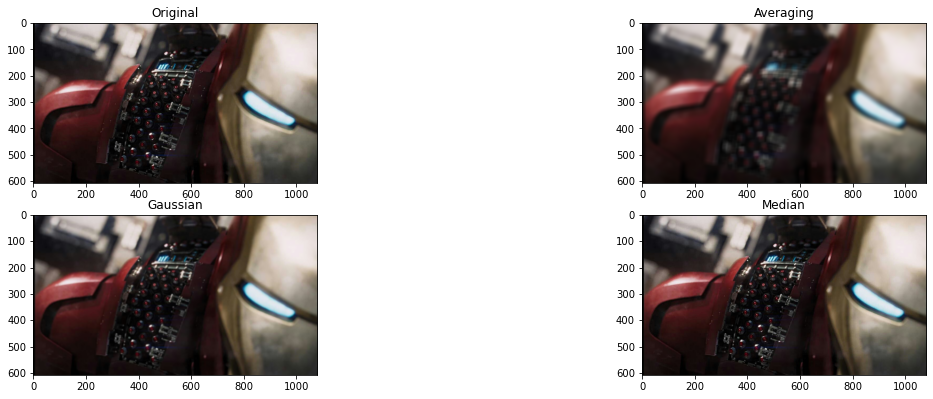

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('C:/Users/psvis/OneDrive/Pictures/Wallpapers/iron_man.jpg')
src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)


ax1.title.set_text('Original')
ax1.imshow(src)

# Smoothing by Averaging
blur = cv2.blur(src, (20,20))
ax2.title.set_text('Averaging')
ax2.imshow(blur)

# Gaussian Smoothing
gauss = cv2.GaussianBlur(src, (5,5), 10)
ax3.title.set_text('Gaussian')
ax3.imshow(gauss)

# Median Smoothing
med = cv2.medianBlur(src, 1)
ax4.title.set_text('Median')
ax4.imshow(med)

plt.show()

## Image Smoothing By Bilateral, Min - Max Filters & Weighted Averaging

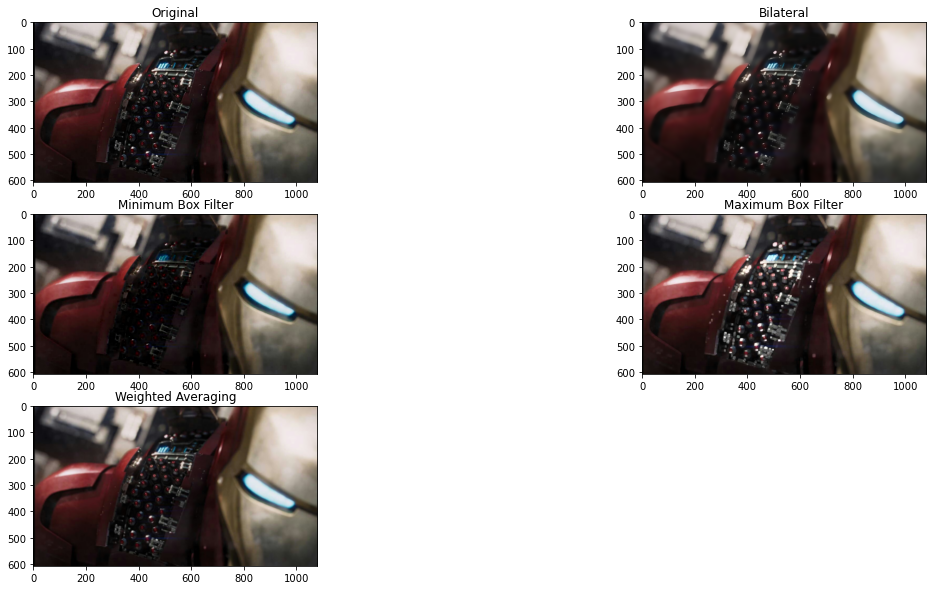

In [3]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)

# Original Image
ax1.title.set_text('Original')
ax1.imshow(src)

# Bilateral Smoothing
bilat = cv2.bilateralFilter(src,20,100,100)
ax2.title.set_text('Bilateral')
ax2.imshow(bilat)

# Minimum Box Filter
size = (5, 5)
shape = cv2.MORPH_RECT
kernel = cv2.getStructuringElement(shape, size)
# Applies the minimum filter with kernel NxN
min_filter = cv2.erode(src, kernel)
ax3.title.set_text('Minimum Box Filter')
ax3.imshow(min_filter)

# Maximum Box Filter
size = (5,5)
shape = cv2.MORPH_RECT
kernel = cv2.getStructuringElement(shape, size)
# Applies the maximum filter with kernel NxN
max_filter = cv2.dilate(src, kernel)
ax4.title.set_text('Maximum Box Filter')
ax4.imshow(max_filter)

# Weighted Averaging
kernel = np.ones((5,5),dtype=np.float32)
kernel[3, 3] = 10.0
kernel /= 34
weight_avg = cv2.filter2D(src,-1,kernel)
ax5.title.set_text('Weighted Averaging')
ax5.imshow(weight_avg)

plt.show()

## Image Sharpening By Laplacian Filter, Unsharp Masking, High Boost Filter & Gradient Masking 

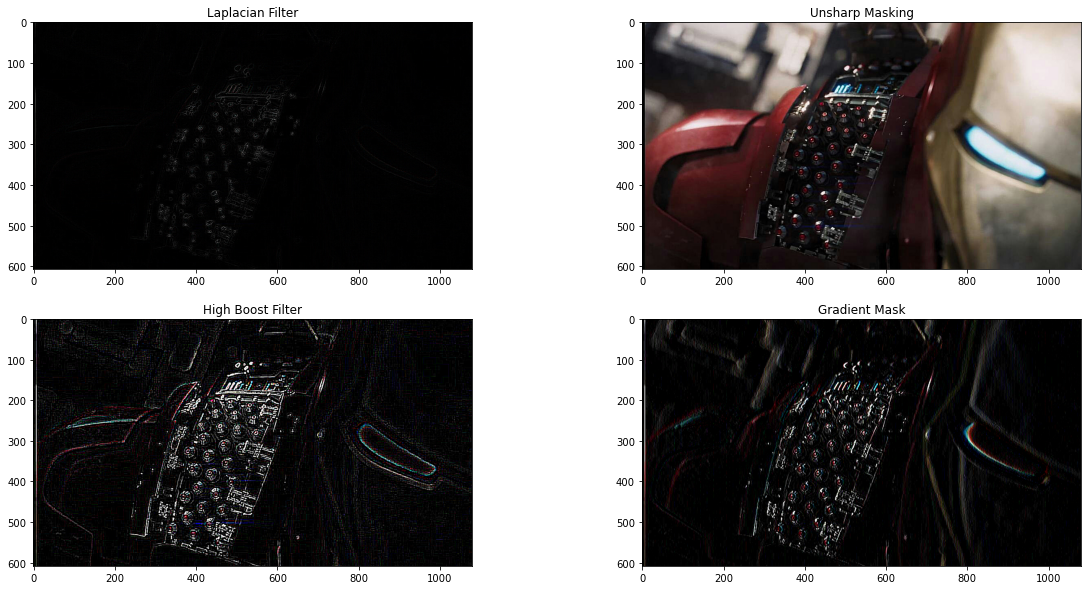

In [4]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# Laplacian Filter
lap = cv2.Laplacian(src, 24, (5,5))
ax1.title.set_text('Laplacian Filter')
ax1.imshow(lap)

# Unsharp Masking
unsharp = cv2.addWeighted(src, 1.5, gauss, -0.5, 0, src)
ax2.title.set_text('Unsharp Masking')
ax2.imshow(unsharp)

# High Boost Filter
kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])
high_boost = cv2.filter2D(src, -1, kernel)
ax3.title.set_text('High Boost Filter')
ax3.imshow(high_boost)

# Gradient Mask
gradient = cv2.Sobel(src,cv2.CV_8UC1, 1, 0)
ax4.imshow(gradient)
ax4.title.set_text('Gradient Mask')

plt.show()

## Noise Removal (Denoising)

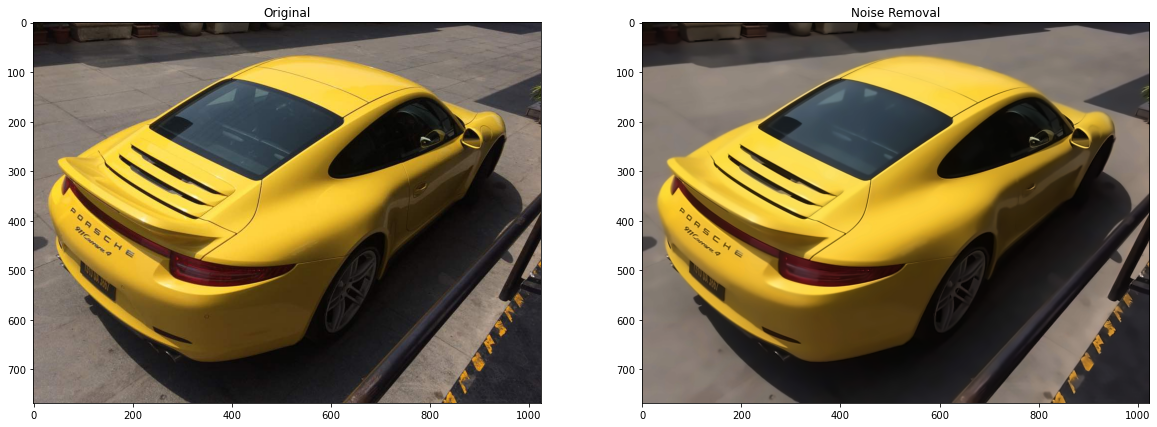

In [5]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

img = cv2.imread('C:/Users/psvis/OneDrive/Pictures/Saved Pictures/Porsche.jpg')
src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

ax1.title.set_text('Original')
ax1.imshow(src)

noise_removal = cv2.fastNlMeansDenoisingColored(src,None,10,10,7,21)
ax2.title.set_text('Noise Removal')
ax2.imshow(noise_removal)

plt.show()

## Histogram Based Processing

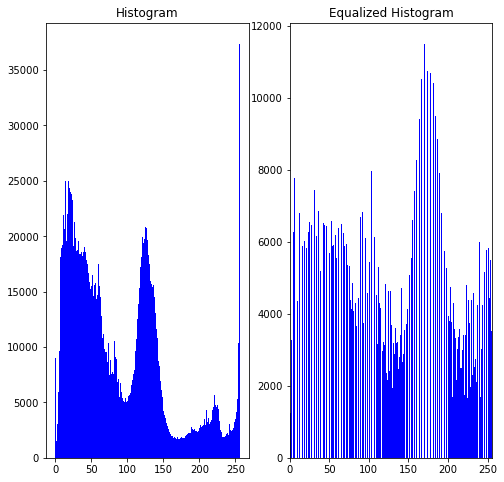

In [24]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Histogram Display
hist,bins = np.histogram(src.flatten(),256,[0,256])
ax1.title.set_text('Histogram')
ax1.hist(src.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])

#Histogram Equalization
src = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(src)
plt.title('Equalized Histogram')
hist,bins = np.histogram(equ.flatten(),256,[0,256])
plt.hist(equ.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])

plt.show()

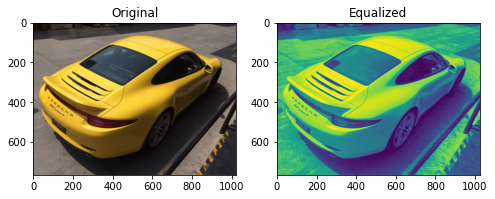

In [25]:
# Displaying Original And Histogram Equalized Images
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ax1.title.set_text('Original')
ax1.imshow(src)
ax2.title.set_text('Equalized')
ax2.imshow(equ)
plt.show()